In [259]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [260]:
df=pd.read_excel("data/Facebook_ads_PIVOT_2021_mod.xlsx")

# module statsmodel can't deal with spaces in column names, so replace them by "_"
df.columns = [ col.replace(' ','_') for col in df.columns]

# Drop the "h" from "h1" so it becomes "1" etc, put this in new column 'hpothesis_int' (int = integer, a whole number)
df['hypothesis_int'] = df['hypothesis'].map({'h1':1, 'h2':2, 'h3':3})

# module statsmodel can't deal with "%"-signs in column names, so replace them by "pct"
df.columns = df.columns.str.replace('%','pct')

df.columns

Index(['Unnamed:_0', 'ad-name', 'target', 'Hypothesis_1', 'Hypothesis_2',
       'Hypothesis_3', 'Teaser', 'English', 'French', 'video', 'campaign_1',
       'campaign_2', 'campaign_3', 'initial_exposure',
       'returning_after_interaction', 'returning_after_video',
       'entrepreneur_(audience)', 'Cost', 'Impressions', 'Post_shares',
       'Post_reactions', 'Post_comments', 'Link_clicks', 'Post_engagements',
       'Landing_page_views', 'Three-second_video_views',
       'Video_watches_at_50pct', 'Video_watches_at_75pct',
       'Video_watches_at_95pct', 'Video_watches_at_100pct', 'is_video',
       'is_portrait', 'name', 'language', 'hypothesis', 'age',
       'hypothesis_int'],
      dtype='object')

In [261]:
df.head()

,Unnamed:_0,ad-name,target,Hypothesis_1,Hypothesis_2,Hypothesis_3,Teaser,English,French,video,...,Video_watches_at_75pct,Video_watches_at_95pct,Video_watches_at_100pct,is_video,is_portrait,name,language,hypothesis,age,hypothesis_int
0,0,what_is_pivot-anie_rouleau-h2-video-natif-en,int-entrepreneur-can-all-25-34,0,28,0,0,0,42,31,...,50,42,38,True,False,anie_rouleau,en,h2,25-34,2
1,2,what_is_pivot-bill_spenceley-h3-video-natif-en,int-entrepreneur-can-all-25-34,0,0,30,0,0,44,33,...,72,62,61,True,False,bill_spenceley,en,h3,25-34,3
2,3,what_is_pivot-lil_macpherson-h1-video-natif-en,int-entrepreneur-can-all-25-34,30,0,0,0,0,44,33,...,271,197,185,True,False,lil_macpherson,en,h1,25-34,1
3,4,what_is_pivot-matt_jamieson-h1-video-natif-en,int-entrepreneur-can-all-25-34,29,0,0,0,0,43,32,...,178,145,139,True,False,matt_jamieson,en,h1,25-34,1
4,5,what_is_pivot-mike_beamish-h2-video-natif-en,int-entrepreneur-can-all-25-34,0,28,0,0,0,42,31,...,109,79,74,True,False,mike_beamish,en,h2,25-34,2




## Dependence of targets on  hypothesis_int,  Impressions, and Cost

We use OLS to check for dependece.

The independent variables (features, regressors, inputs) are hypothesis_int,  Impressions, and Cost

The dependent variables (targets, outputs) are 'Link_clicks', 'Post_engagements', 'Post_shares', 'Video_watches_at_50pct'

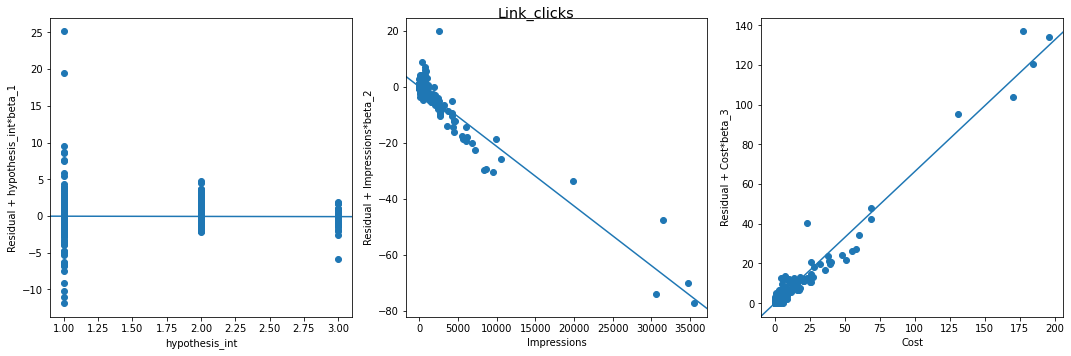

                            OLS Regression Results                            
Dep. Variable:            Link_clicks   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     3313.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:38:12   Log-Likelihood:                -2947.9
No. Observations:                1742   AIC:                             5904.
Df Residuals:                    1738   BIC:                             5926.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0913      0.086      1.

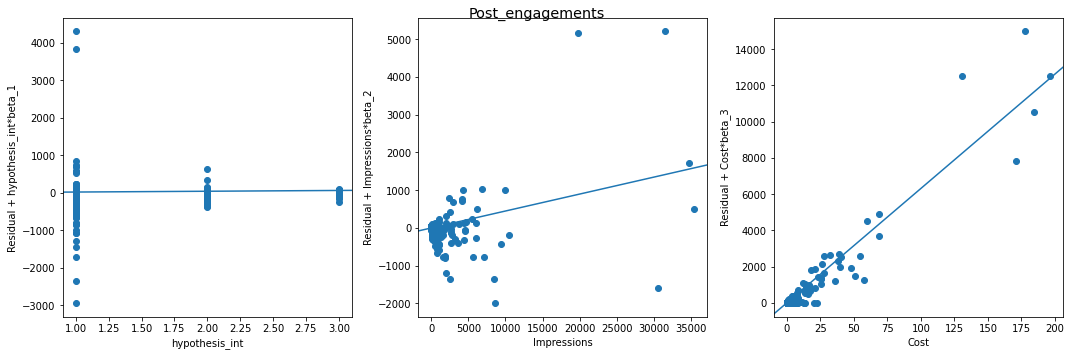

                            OLS Regression Results                            
Dep. Variable:       Post_engagements   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     7404.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:38:12   Log-Likelihood:                -11763.
No. Observations:                1742   AIC:                         2.353e+04
Df Residuals:                    1738   BIC:                         2.356e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -78.9392     13.488     -5.

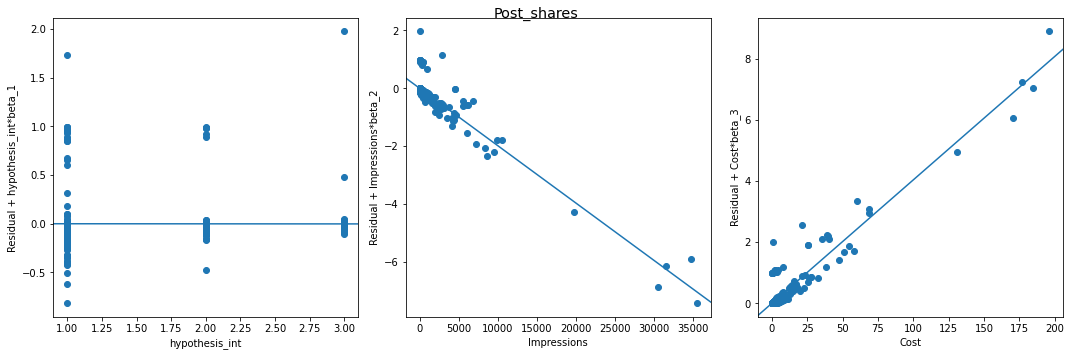

                            OLS Regression Results                            
Dep. Variable:            Post_shares   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          7.42e-115
Time:                        13:38:12   Log-Likelihood:                 1094.4
No. Observations:                1742   AIC:                            -2181.
Df Residuals:                    1738   BIC:                            -2159.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0024      0.008      0.

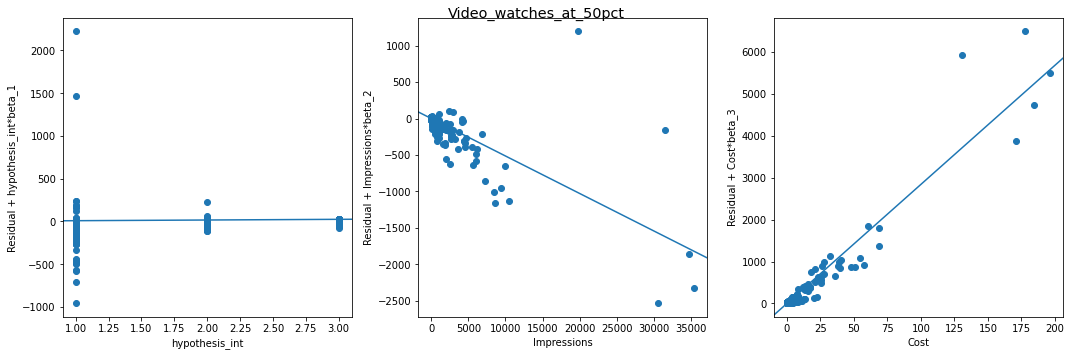

                              OLS Regression Results                              
Dep. Variable:     Video_watches_at_50pct   R-squared:                       0.855
Model:                                OLS   Adj. R-squared:                  0.855
Method:                     Least Squares   F-statistic:                     3415.
Date:                    Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                            13:38:13   Log-Likelihood:                -10194.
No. Observations:                    1742   AIC:                         2.040e+04
Df Residuals:                        1738   BIC:                         2.042e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Inte

In [266]:
dat = df    #or just:? df[df['language']=='en']
#'campaign','initial exposure','Cost','age group','h1','h2','h3'
targets = ['Link_clicks', 'Post_engagements', 'Post_shares', 'Video_watches_at_50pct']
for target in targets:
    model = smf.ols(f'{target} ~ hypothesis_int + Impressions + Cost', data=dat) 
    result = model.fit()
    fig = plt.figure(figsize=(15, 5))
    sm.graphics.plot_ccpr_grid(result,grid=(1,3),fig=fig)
    plt.suptitle(target, fontsize='x-large')
    plt.show()
    print(result.summary())
    
    
    #for name in model.exog_names:
    #    if name != 'Intercept':
    #        sm.graphics.plot_ccpr(result, name)

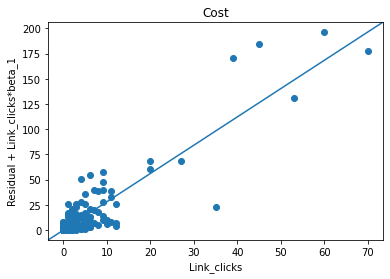

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     8715.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:21:09   Log-Likelihood:                -5002.1
No. Observations:                1742   AIC:                         1.001e+04
Df Residuals:                    1740   BIC:                         1.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0308      0.104     -0.296      

In [254]:
dat = df[df['language']=='en']
#'campaign','initial exposure','Cost','age group','h1','h2','h3'
model = smf.ols('Cost ~ Link_clicks', data=df) 
result = model.fit()


sm.graphics.plot_ccpr(result, 'Link_clicks')
plt.title('Cost')
plt.show()
        
print(result.summary())



## A made up example to demonstrate OLS (ordinary least square)

The blue dots are randomly generated data. They are generated by adding noisy random fluctuations to data which lie on a line.
OLS is the used to reconstruct the line (which we knew was there in the first place). 
This is supposed to show that when there IS a linear relationship which is just distorted by fluctuations or measurment errors, OLS is really good at finding it. I didn't plot the original line, but I have no doubt, it's pretty close.

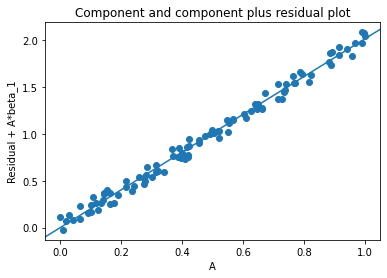

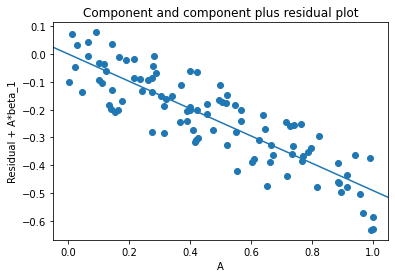

In [256]:
# Make some random data points
df = pd.DataFrame(np.random.rand(100,1))
# Put them in column A, the independet variable
df.columns = ['A']

#In column B, put data depending linearly on A, but add a weak (0.2) random error
df['B'] = (df['A']*2)+1 + np.random.rand(100)*(0.2)

#In column C, put data with different linear dependance on A, add a stronger (0.3) random error
df['C'] = df['A']*(-0.5)+2 + np.random.rand(100)*(0.3)


model = smf.ols('B ~ A', data=df)
res3 = model.fit()
sm.graphics.plot_ccpr(res3, 'A')

model = smf.ols('C ~ A', data=df)
res3 = model.fit()
sm.graphics.plot_ccpr(res3, 'A');